# Movie Recommender System

Authors:

1. Oscar Mulei

2. Rose Kyalo

3. Angel Linah Atungire

Program: Moringa School Data Science

Group 2

## Overview

In today's dynamic digital marketplace, recommendation systems efficiently bridge the gap between buyers and a diverse array of items by analyzing user behavior and preferences. These systems serve to streamline the shopping experience by suggesting personalized options, effectively assisting sellers in meeting customer needs and significantly boosting sales and satisfaction.

## Business Understanding

The project's goal is to develop a movie recommendation system that recommends the best five films
based on user ratings. The technology will assess user preferences and offer personalized
recommendations using collaborative filtering techniques. The project's primary goal is to create a
recommender system, a subset of artificial intelligence that predicts user preferences and recommends
movies that the user might love. To automatically estimate user preferences, collaborative filtering will
be used.

## Business Problem

Company A, a renowned player in the movie production industry, is keen to optimize its promotional strategies for a diverse portfolio of films. They've sought our expertise to engineer a robust movie recommendation system. This system aims to deliver tailor-made movie suggestions to their audience, ultimately amplifying user engagement and fueling successful promotional endeavors.

## Key Objectives

1. **Precision in Recommendations**

Develop an algorithm that accurately identifies and suggests the top five movies based on user ratings, ensuring the recommendations align closely with individual user preferences.

2. **User Engagement Enhancement**

Create a recommendation system that significantly boosts user engagement by delivering personalized movie suggestions, thereby increasing user interaction and time spent on the platform.

3. **Promotional Effectiveness**

Design a robust recommendation system that empowers Company A to enhance their film promotion strategies by providing tailored movie suggestions to their audience, ultimately driving successful promotional campaigns and increasing viewership.

## Data Understanding

In this project, we'll utilize the MovieLens dataset, available at [this link](https://grouplens.org/datasets/movielens/latest/). This dataset comprises essential files:

1. **links.csv:** Provides linkage information, connecting movies to external databases or resources.
2. **movies.csv:** Contains details about the movies themselves, such as titles, genres, and release years.
3. **ratings.csv:** Holds user-generated movie ratings, offering insights into how users perceive and rate different films.
4. **tags.csv:** Contains descriptive tags or labels applied by users to movies, adding another layer of user-generated information to enhance understanding and categorization.

These files collectively furnish a comprehensive view of user interactions with movies, encompassing both quantitative ratings and qualitative descriptive tags, offering a rich source of data for our recommendation system.

In [1]:
# import necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
links = pd.read_csv("Data/links.csv")
tags = pd.read_csv("Data/tags.csv")
ratings = pd.read_csv("Data/ratings.csv")
movies = pd.read_csv("Data/movies.csv")

In [3]:
movies_and_ratings = pd.merge(movies, ratings, on ='movieId')

Let's parse the movie titles to extract the release year, which is enclosed within parentheses. We'll create a new column for the extracted years and remove them from the original title column.

In [4]:
# Extract years from titles within brackets using regular expressions
years = movies_and_ratings['title'].str.extract(r'\((\d{4})\)', expand=False)

# Convert the extracted years to integers
movies_and_ratings['Year'] = years.astype(float).astype(pd.Int64Dtype())

# Remove the extracted years from the original title column
movies_and_ratings['title'] = movies_and_ratings['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)

# Displaying the DataFrame with movie titles and extracted years as integers
print(movies_and_ratings[['title', 'Year']])


                                     title  Year
0                                Toy Story  1995
1                                Toy Story  1995
2                                Toy Story  1995
3                                Toy Story  1995
4                                Toy Story  1995
...                                    ...   ...
100831  Black Butler: Book of the Atlantic  2017
100832               No Game No Life: Zero  2017
100833                               Flint  2017
100834        Bungo Stray Dogs: Dead Apple  2018
100835        Andrew Dice Clay: Dice Rules  1991

[100836 rows x 2 columns]


To ascertain a potential relationship between a movie's release year and its average rating, we've computed the age of each movie by subtracting its release year from the current year. By correlating these movie ages with their respective average ratings, we aim to explore whether there's any connection between a movie's release time and the ratings it receives.

In [5]:
movies_and_ratings["Age"] = 2023 - movies_and_ratings["Year"]

In [6]:
avg_rating_by_age = movies_and_ratings.groupby(["Age","title"])["rating"].mean()
avg_rating_by_age

Age  title                                        
5    A Quiet Place                                    2.750000
     A Wrinkle in Time                                3.000000
     Alpha                                            4.500000
     Annihilation                                     3.833333
     Ant-Man and the Wasp                             3.666667
                                                        ...   
107  Snow White                                       3.500000
108  Birth of a Nation, The                           2.000000
115  The Electric Hotel                               4.000000
120  The Great Train Robbery                          2.500000
121  Trip to the Moon, A (Voyage dans la lune, Le)    3.500000
Name: rating, Length: 9706, dtype: float64

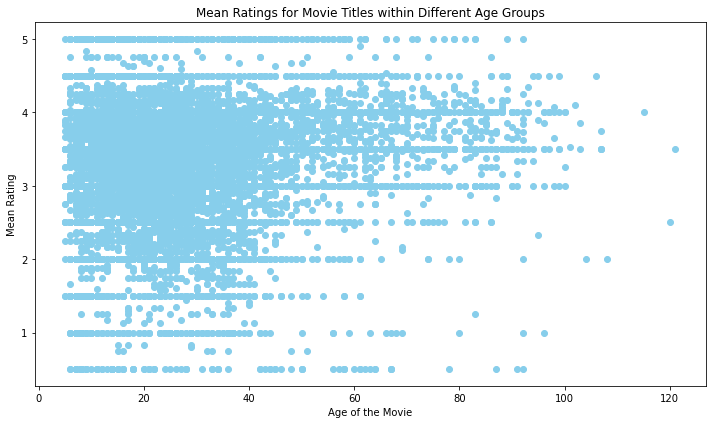

In [7]:
# Reset the index to access 'Age' and 'Average Ratings' separately
data_reset_index = avg_rating_by_age.reset_index()

# Extract 'Age' and 'Average Ratings' for plotting
age = data_reset_index['Age']
avg_ratings = data_reset_index['rating']


plt.figure(figsize=(10, 6))  
plt.scatter(age,avg_ratings,color='skyblue')
plt.title('Mean Ratings for Movie Titles within Different Age Groups')
plt.ylabel('Mean Rating')  
plt.xlabel('Age of the Movie')  
plt.tight_layout()
plt.show()

The scatter plot reveals a distinct clustering pattern, showcasing average ratings predominantly within the range of 2 to 4.5 for movies aged from 0 to around 50 years. This suggests a tendency for recently released movies to accumulate ratings within this particular span. However, as movies surpass the 60-year mark, the clustering diminishes notably. This trend implies a shift in audience interest towards newer iterations or fresher content as movies age, leading to decreased clustering and diversity in ratings for older movies.

To explore the distribution of the ratings column and visualize the count of each rating, we'll create a bar graph that displays the count of ratings.

In [8]:
# distribution of ratings
movies_and_ratings.rating.unique()

array([4. , 4.5, 2.5, 3.5, 3. , 5. , 0.5, 2. , 1.5, 1. ])

In [9]:
# group by movie title and find the average rating
title_rating = movies_and_ratings.groupby(["title","rating"])["rating"].mean()
title_rating

title                               rating
'71                                 4.0       4.0
'Hellboy': The Seeds of Creation    4.0       4.0
'Round Midnight                     3.5       3.5
'Salem's Lot                        5.0       5.0
'Til There Was You                  3.0       3.0
                                             ... 
¡Three Amigos!                      3.0       3.0
                                    3.5       3.5
                                    4.0       4.0
                                    5.0       5.0
À nous la liberté (Freedom for Us)  1.0       1.0
Name: rating, Length: 29959, dtype: float64

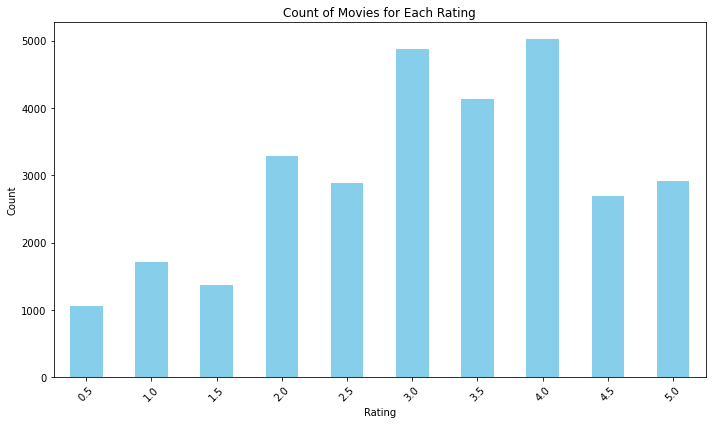

In [10]:
# Group the data by rating and count the number of occurrences
rating_counts = title_rating.groupby('rating').count()

# Create a bar plot for the count of movies for each rating category
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Movies for Each Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Upon analyzing the visualization, it's evident that the majority of movies received ratings of 4 and 3. Conversely, a smaller number of movies were rated at 0.5, indicating that very few movies garnered such low ratings.

To illustrate the distribution of movies across different genres, we aim to display the count of movies within each genre category. This visualization provides insights into how movies are distributed across various genres, showcasing the frequency or occurrence of each genre in the dataset.

In [11]:
genres_movie = movies_and_ratings.groupby(["genres","title"]).sum()
genres_movie

movieId  userId  rating  \
genres             title                                                
(no genres listed) A Christmas Story Live!     182727     514     2.0   
                   A Cosmic Christmas          149330     514     4.0   
                   A Midsummer Night's Dream   159779     210     4.0   
                   Ali Wong: Baby Cobra        159161     111     4.5   
                   Ben-hur                     122888     567     0.5   
...                                               ...     ...     ...   
Western            True Grit                  2308852    9772   105.0   
                   Wild Bill                      840    1159    12.0   
                   Winchester '73                6429     177     4.0   
                   Winds of the Wasteland       70492      68     3.5   
                   Wyatt Earp                    8043    5402    65.0   

                                                timestamp   Year  Age  
genres             title                                               
(no genres listed) A Christmas Story Live!     1536381035   2017    6  
                   A Cosmic Christmas          1535944005   1977   46  
                   A Midsummer Night's Dream   1530467762   2016    7  
                   Ali Wong: Baby Cobra        1517441228   2016    7  
                   Ben-hur                     1525289924   2016    7  
...                                                   ...    ...  ...  
Western            True Grit                  39201133401  56280  364  
                   Wild Bill                   4348224981   7980  112  
                   Winchester '73              1435720464   1950   73  
                   Winds of the Wasteland      1346109885   1936   87  
                   Wyatt Earp                 20116171632  41874  609  

[9683 rows x 6 columns]

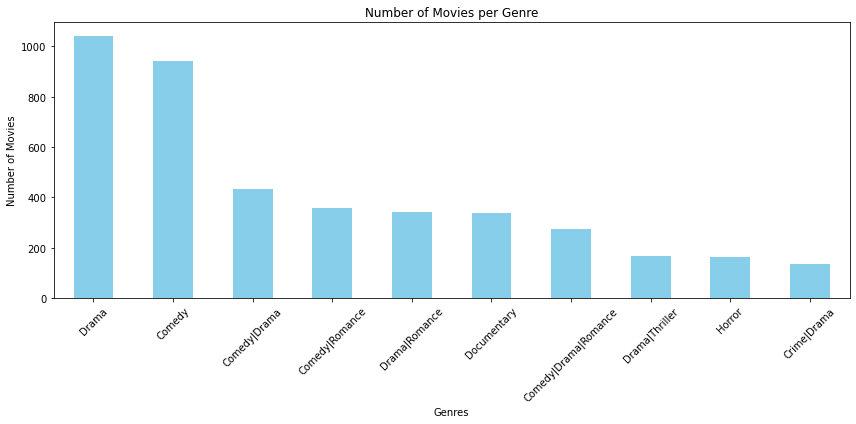

In [12]:
genres_movie_reset_index = genres_movie.reset_index()

genre_counts = genres_movie_reset_index["genres"].value_counts().sort_values(ascending = False).head(10)

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies per Genre')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The analysis highlights Drama as the genre with the most extensive count of movies in the dataset, followed closely by Comedy. Furthermore, Comedy appears consistently among the genres with the highest number of movies, maintaining a prominent presence across the top genres in terms of movie count.